# Electrofacies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import numpy as np

## Lectura del archivo LAS

In [3]:
las = lasio.read("W19.las")

## Descripcion del pozo

In [4]:
for item in las.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

START DEPTH (STRT): 4030.065
STOP DEPTH (STOP): 4119.981
STEP VALUE (STEP): 0.1524
NULL VALUE (NULL): -999.0
COMPANY (COMP): 
LAS file Creation Date (DATE): 18/05/2020
Latitude/Northing (LATI): 0
Longitude/Easting (LONG): 0
Def_Rw (RWS): -999
Def_Rwt (WST): -999


## Curvas del pozo

In [5]:
for curve in las.curves:
    print(curve.mnemonic)

DEPTH
BS
CALI
CGR
DTCO
GR
LLD
LLS
MSFL
NPHI
PEF
POTA
RHOB
SGR
TENS
THOR
URAN


## Descripcion de las curvas

In [6]:
for count, curve in enumerate(las.curves):
    print(f"Curva: {curve.mnemonic}, Unidades: {curve.unit}, Descripcion: {curve.descr}")
print(f"El pozo tiene un total de: {count+1} curvas")

Curva: DEPTH, Unidades: M, Descripcion: Depth
Curva: BS, Unidades: in, Descripcion: 
Curva: CALI, Unidades: in, Descripcion: Caliper
Curva: CGR, Unidades: gAPI, Descripcion: GammaRay
Curva: DTCO, Unidades: us/ft, Descripcion: Sonic
Curva: GR, Unidades: gAPI, Descripcion: GammaRay
Curva: LLD, Unidades: ohmm, Descripcion: DeepRes
Curva: LLS, Unidades: ohmm, Descripcion: MedRes
Curva: MSFL, Unidades: ohmm, Descripcion: MicroRes
Curva: NPHI, Unidades: V/V, Descripcion: Neutron
Curva: PEF, Unidades: B/E, Descripcion: PEF
Curva: POTA, Unidades: %, Descripcion: Spectral
Curva: RHOB, Unidades: G/C3, Descripcion: Density
Curva: SGR, Unidades: gAPI, Descripcion: GammaRay
Curva: TENS, Unidades: LBF, Descripcion: Tension
Curva: THOR, Unidades: ppm, Descripcion: Spectral
Curva: URAN, Unidades: ppm, Descripcion: Spectral
El pozo tiene un total de: 17 curvas


## Se crea el dataframe

In [7]:
well = las.df()
well.describe()

,BS,CALI,CGR,DTCO,GR,LLD,LLS,MSFL,NPHI,PEF,POTA,RHOB,SGR,TENS,THOR,URAN
count,556.0,478.000000,478.000000,591.000000,591.000000,556.000000,556.000000,556.000000,478.000000,478.000000,478.000000,478.000000,478.000000,556.000000,478.000000,478.000000
mean,8.5,10.516853,36.126579,63.102617,34.216691,8.858024,2.241240,99.883902,0.162221,3.935159,0.013771,2.428055,38.707865,6314.559353,2.598775,0.284880
std,0.0,1.852647,20.116113,24.317180,15.519535,17.680975,2.689729,410.278129,0.067389,247.137055,0.008345,0.202352,16.688825,95.343145,1.269549,0.545540
min,8.5,8.448700,4.035400,-471.926000,8.654500,0.063500,0.078300,0.690700,0.021400,-4395.873500,0.000900,1.570900,10.076000,6087.000000,0.045100,-0.937900
25%,8.5,8.509425,19.223575,54.786200,21.980100,0.334775,0.150375,2.489200,0.127925,4.359275,0.006700,2.319475,25.659300,6247.500000,1.499225,-0.120025
50%,8.5,10.244650,34.339450,60.623500,29.286100,3.142600,2.137800,3.749800,0.160250,4.751000,0.012950,2.459900,37.110150,6290.000000,2.925600,0.210300
75%,8.5,11.780225,54.904025,72.793400,49.092150,4.643350,3.079775,7.676125,0.191875,21.271050,0.021800,2.587525,53.250525,6375.250000,3.673525,0.654775
max,8.5,18.024800,70.972300,93.000700,67.594600,60.520000,21.464500,2000.000000,0.494000,760.723600,0.029600,2.764400,73.902100,6740.000000,4.926200,2.146500


In [8]:
well.head();

In [9]:
well.tail();

In [10]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 591 entries, 4030.0655 to 4119.9815
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BS      556 non-null    float64
 1   CALI    478 non-null    float64
 2   CGR     478 non-null    float64
 3   DTCO    591 non-null    float64
 4   GR      591 non-null    float64
 5   LLD     556 non-null    float64
 6   LLS     556 non-null    float64
 7   MSFL    556 non-null    float64
 8   NPHI    478 non-null    float64
 9   PEF     478 non-null    float64
 10  POTA    478 non-null    float64
 11  RHOB    478 non-null    float64
 12  SGR     478 non-null    float64
 13  TENS    556 non-null    float64
 14  THOR    478 non-null    float64
 15  URAN    478 non-null    float64
dtypes: float64(16)
memory usage: 78.5 KB


## Se visualizan los datos nulos

In [11]:
well_nan = well.notnull() * 1
# Se multiplica por 1 ya que df.notnull() es un valor boleano (True or False), sino se tienen datos es igual a 0, sino es igual al valor que tiene
well_nan.head(3)

,BS,CALI,CGR,DTCO,GR,LLD,LLS,MSFL,NPHI,PEF,POTA,RHOB,SGR,TENS,THOR,URAN
DEPTH,,,,,,,,,,,,,,,,
4030.0655,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4030.2179,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4030.3703,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


## Visualizar los datos que se cuentan de cada curva en profundidad

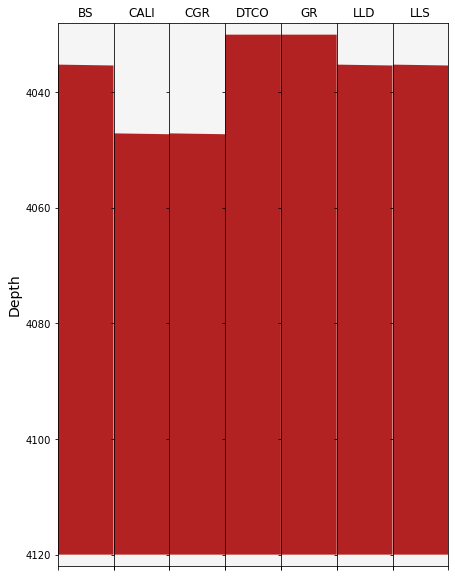

In [12]:
fig = plt.subplots(figsize=(7,10))

ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1)

columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    ax.set_ylim(4122, 4028)
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='firebrick')
    # Quitar etiquetas 
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()

In [13]:
pozo=well.reset_index()
pozo.head(3)

,DEPTH,BS,CALI,CGR,DTCO,GR,LLD,LLS,MSFL,NPHI,PEF,POTA,RHOB,SGR,TENS,THOR,URAN
0,4030.0655,NaN,NaN,NaN,55.3084,27.3528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4030.2179,NaN,NaN,NaN,55.3084,28.7513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4030.3703,NaN,NaN,NaN,55.3084,32.8162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Seleccion de la zona 4  
>[4090.1111 - 4103.8271]

In [14]:
zona=pozo[['DEPTH','GR','LLD','NPHI','RHOB','DTCO']].loc[(pozo['DEPTH']>4090.1111) & (pozo['DEPTH']<=4103.8271)]
# Se seleccionan las 6 columnas, donde la profundidad se encuentre en el rango de la zona que nos corresponde
zona.head(3)

,DEPTH,GR,LLD,NPHI,RHOB,DTCO
395,4090.2635,42.7736,5.7734,0.3254,1.8430,74.3493
396,4090.4159,39.3569,6.2086,0.2387,1.8983,71.5869
397,4090.5683,38.1350,5.2418,0.1086,1.9080,61.3880


In [15]:
zona=zona.reset_index(drop=True)
zona.head(3)

,DEPTH,GR,LLD,NPHI,RHOB,DTCO
0,4090.2635,42.7736,5.7734,0.3254,1.8430,74.3493
1,4090.4159,39.3569,6.2086,0.2387,1.8983,71.5869
2,4090.5683,38.1350,5.2418,0.1086,1.9080,61.3880


## Teniendo nuestra zona delimitada procedemos a trabajarla, primero normalizando los datos

In [16]:
zona_norm=zona.copy()
for column in zona_norm.columns:
    if column=='GR':
        zona_norm[column]=zona_norm[column]/100 #valor maximo para GR
    elif column=='LLD':
        zona_norm[column]=zona_norm[column]/500 #valor maximo para Resistividad
    elif column=='NPHI':
        zona_norm[column]=zona_norm[column]/0.45 #valor maximo para porosidad
    elif column=='RHOB':
        zona_norm[column]=zona_norm[column]/2.9 #valor maximo para densidad
    elif column=='DTCO':
        zona_norm[column]=zona_norm[column]/140 #valor maximo para DT

zona_norm.describe()

,DEPTH,GR,LLD,NPHI,RHOB,DTCO
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,4097.045300,0.483118,0.006892,0.377138,0.821348,0.543703
std,3.981404,0.074124,0.002335,0.119277,0.073922,0.044314
min,4090.263500,0.277878,0.002971,0.104000,0.635517,0.438486
25%,4093.654400,0.439366,0.005635,0.312500,0.757517,0.514779
50%,4097.045300,0.489759,0.006611,0.362222,0.851586,0.550752
75%,4100.436200,0.529259,0.007520,0.443667,0.882569,0.572093
max,4103.827100,0.622664,0.015455,0.723111,0.922793,0.664291


## Grafica de arañas (spyder charts)

In [17]:
zcopy=zona_norm[['GR','DTCO','LLD','RHOB','NPHI','GR']].to_numpy()
# se pasan los datos a un arreglo, para evitar los encabezados del dataframe

Enlace de como hacer la grafica de araña <https://www.pythoncharts.com/matplotlib/radar-charts/>

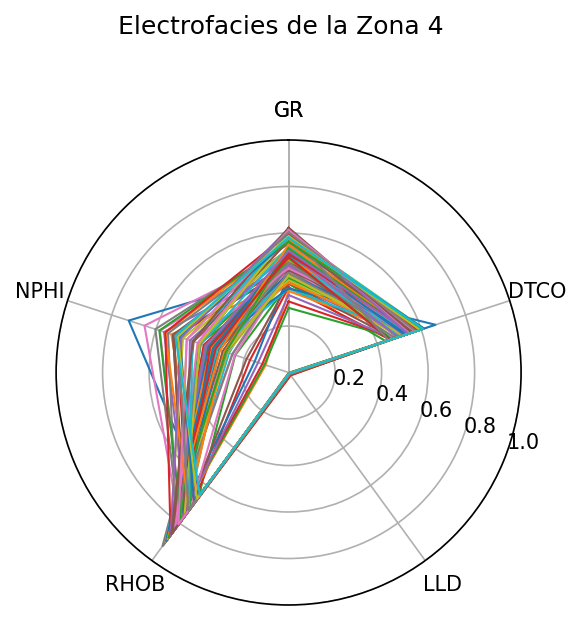

In [18]:
etiquetas=['GR','DTCO','LLD','RHOB','NPHI','GR'] # se generan las labels para la grafica
angulos = np.linspace(0, 2*np.pi,len(zcopy[0])) # como es un circulo, se generan 5 angulos equidistantes de 0 a 2pi
angulos += angulos[:1] #se agrega el primero al final para cerrar la grafica

fig, ax = plt.subplots(figsize=(4, 5), subplot_kw=dict(polar=True))

for a in range(len(zcopy)):
    ax.plot(angulos, zcopy[a,:], linewidth=1) #se grafica la linea
    
#Se acomodan las etiquetas
ax.set_theta_offset(np.pi/2) # para que inicien en las 12 en punto
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angulos),etiquetas) #se dibujan las etiquetas
ax.set_rticks((0.2, 0.4, 0.6, 0.8, 1.0))
ax.set_rlabel_position(110)

fig.set_dpi(150)

plt.suptitle('Electrofacies de la Zona 4', fontsize=12)
plt.show()

## Grafica de escalera

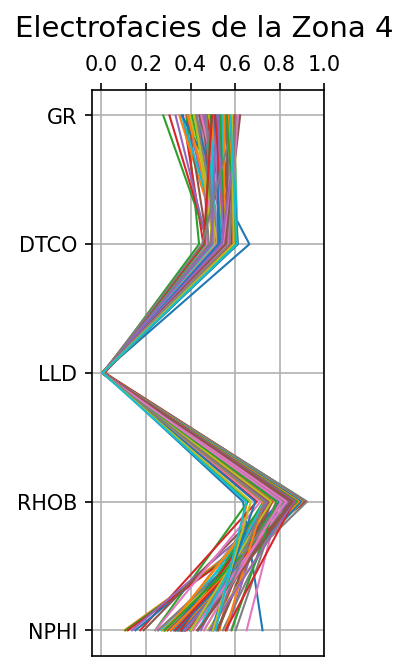

In [19]:
etiquetas=['GR','DTCO','LLD','RHOB','NPHI'] # se generan las labels para la grafica

fig, ax = plt.subplots(figsize=(2, 5))

for a in range(len(zcopy)):
    ax.plot(zcopy[a,0:5], etiquetas, linewidth=1) #se grafica la linea

plt.grid(True)
ax.set_xticks((0.0, 0.2, 0.4, 0.6, 0.8, 1.0))
ax.invert_yaxis()
ax.xaxis.tick_top()
    
fig.set_dpi(150)

plt.suptitle('Electrofacies de la Zona 4\n ', fontsize=14)
plt.show()

## Matriz para rocas

In [20]:
# Matriz de las rocas ['GR','DTCO','LLD','RHOB','NPHI', 'GR']
rocas=np.array([[5, 47.5, 500, 2.71, 0.01, 5], #Caliza - Limestone
                [10, 55.5, 100, 2.65, -0.01, 10], #Arenisca - Sandstone
                [100, 100, 2, 2.3, 0.35, 100], #Arcilla, Lutita - Shale
                [10, 43.5, 500, 2.87, 0.02, 10] #Dolomita
                ])


## Normalizacion de rocas

In [21]:
rocas_norm=rocas.copy()
rocas_norm[:,0]=rocas_norm[:,0]/100 #valor maximo para GR
rocas_norm[:,1]=rocas_norm[:,1]/140 #valor maximo para DT
rocas_norm[:,2]=rocas_norm[:,2]/500 #valor maximo para Resistividad
rocas_norm[:,3]=rocas_norm[:,3]/2.9 #valor maximo para densidad
rocas_norm[:,4]=rocas_norm[:,4]/0.45 #valor maximo para porosidad
rocas_norm[:,5]=rocas_norm[:,5]/100 #valor maximo para GR


## Grafica de araña para rocas

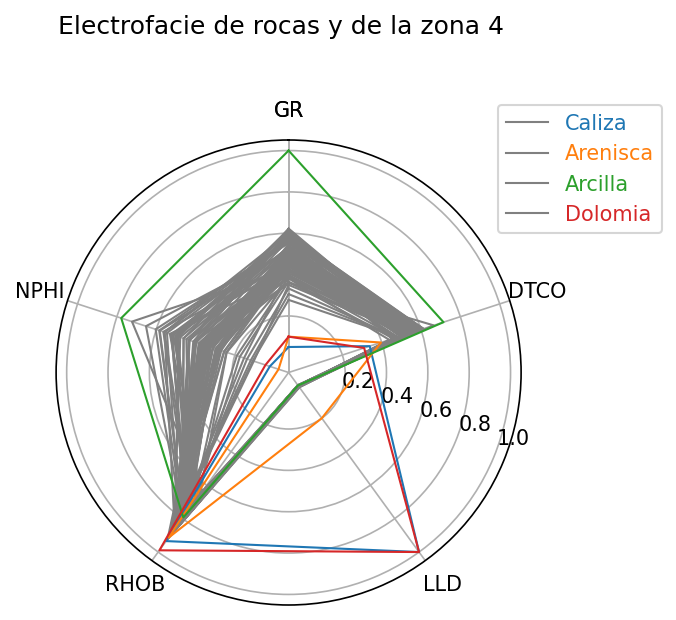

In [22]:
etiquetas=['GR','DTCO','LLD','RHOB','NPHI','GR'] # se generan las labels para la grafica
angulos = np.linspace(0, 2*np.pi,len(rocas_norm[0])) # como es un circulo, se generan 5 angulos equidistantes de 0 a 2pi
angulos += angulos[:1] #se agrega el primero al final para cerrar la grafica

fig, ax = plt.subplots(figsize=(4, 5), subplot_kw=dict(polar=True))

for a in range(len(zcopy)):
    ax.plot(angulos, zcopy[a,:], color='gray', linewidth=1) #se grafica la linea

for a in range(len(rocas_norm)):
    ax.plot(angulos, rocas_norm[a,:], linewidth=1) #se grafica la linea
    
#Se acomodan las etiquetas
ax.set_theta_offset(np.pi/2) # para que inicien en las 12 en punto
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angulos),etiquetas) #se dibujan las etiquetas
ax.set_rticks((0.2, 0.4, 0.6, 0.8, 1.0))
ax.set_rlabel_position(110)

fig.set_dpi(150)

plt.legend(labelcolor=['C0', 'C1', 'C2', 'C3'],labels=['Caliza','Arenisca', 'Arcilla', 'Dolomia'],loc=(0.95, 0.8))

plt.suptitle('Electrofacie de rocas y de la zona 4', fontsize=12)
plt.show()

## Grafica de escalera para rocas

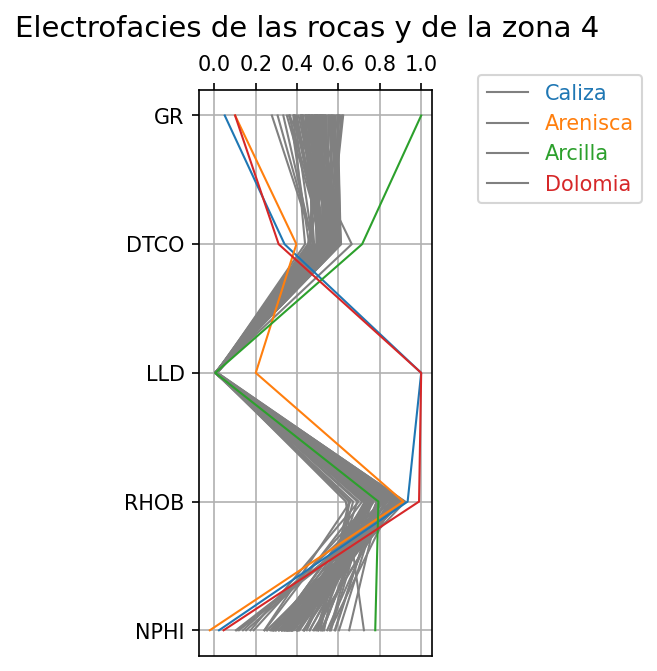

In [23]:
etiquetas=['GR','DTCO','LLD','RHOB','NPHI'] # se generan las labels para la grafica

fig, ax = plt.subplots(figsize=(2, 5))

for a in range(len(zcopy)):
    ax.plot(zcopy[a,0:5], etiquetas, color='gray', linewidth=1) #se grafica los datos

for a in range(len(rocas_norm)):
    ax.plot(rocas_norm[a,0:5], etiquetas, linewidth=1) #se grafica la linea

plt.grid(True)
ax.set_xticks((0.0, 0.2, 0.4, 0.6, 0.8, 1.0))
ax.invert_yaxis()
ax.xaxis.tick_top()
    
fig.set_dpi(150)

plt.legend(labelcolor=['C0', 'C1', 'C2', 'C3'], labels=['Caliza','Arenisca', 'Arcilla', 'Dolomia'],loc=(1.2, 0.8))

plt.suptitle('Electrofacies de las rocas y de la zona 4 ', fontsize=14)
plt.show()

## Identificando a que se asemeja la matriz los graficamos juntos

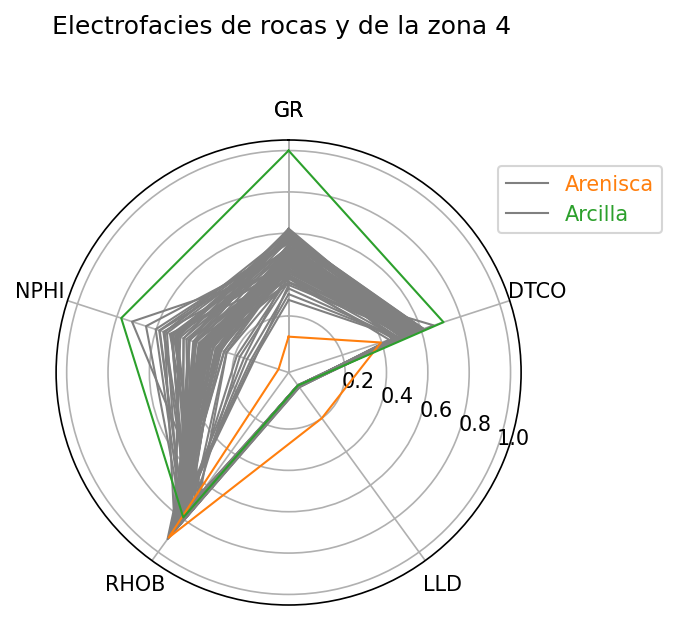

In [24]:
etiquetas=['GR','DTCO','LLD','RHOB','NPHI','GR'] # se generan las labels para la grafica
angulos = np.linspace(0, 2*np.pi,len(rocas_norm[0])) # como es un circulo, se generan 5 angulos equidistantes de 0 a 2pi
angulos += angulos[:1] #se agrega el primero al final para cerrar la grafica

fig, ax = plt.subplots(figsize=(4, 5), subplot_kw=dict(polar=True))

for a in range(len(zcopy)):
    ax.plot(angulos, zcopy[a,:], color='gray', linewidth=1) #se grafica la linea

ax.plot(angulos, rocas_norm[1,:], color='C1', linewidth=1) #se grafica la arenisca
ax.plot(angulos, rocas_norm[2,:], color='C2', linewidth=1) #se grafica la arcilla
    
#Se acomodan las etiquetas
ax.set_theta_offset(np.pi/2) # para que inicien en las 12 en punto
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angulos),etiquetas) #se dibujan las etiquetas
ax.set_rticks((0.2, 0.4, 0.6, 0.8, 1.0))
ax.set_rlabel_position(110)

fig.set_dpi(150)

plt.legend(labelcolor=['C1', 'C2'],labels=['Arenisca', 'Arcilla'],loc=(0.95, 0.8))

plt.suptitle('Electrofacies de rocas y de la zona 4', fontsize=12)
plt.show()

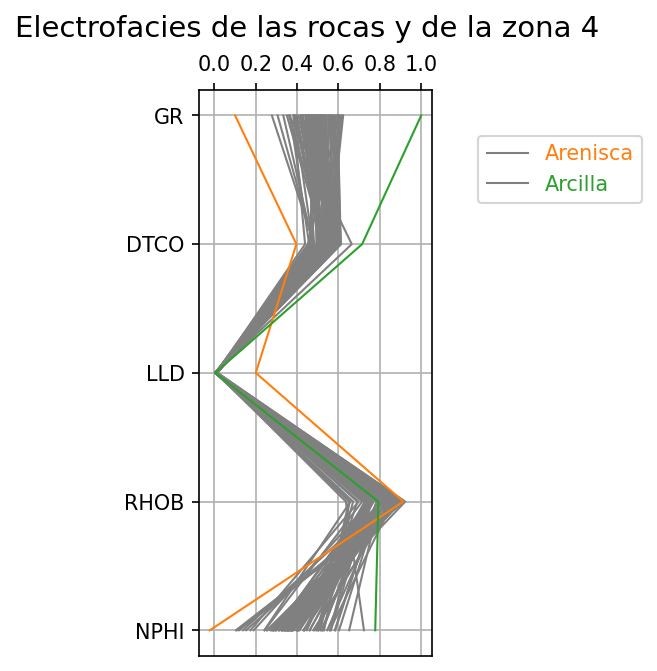

In [25]:
etiquetas=['GR','DTCO','LLD','RHOB','NPHI'] # se generan las labels para la grafica

fig, ax = plt.subplots(figsize=(2, 5))

for a in range(len(zcopy)):
    ax.plot(zcopy[a,0:5], etiquetas, color='gray', linewidth=1) #se grafica los datos

ax.plot(rocas_norm[1,0:5], etiquetas, color='C1', linewidth=1) #se grafica la arenisca
ax.plot(rocas_norm[2,0:5], etiquetas, color='C2', linewidth=1) #se grafica la arcilla

plt.grid(True)
ax.set_xticks((0.0, 0.2, 0.4, 0.6, 0.8, 1.0))
ax.invert_yaxis()
ax.xaxis.tick_top()
    
fig.set_dpi(150)

plt.legend(labelcolor=['C1', 'C2'], labels=['Arenisca', 'Arcilla'],loc=(1.2, 0.8))

plt.suptitle('Electrofacies de las rocas y de la zona 4 ', fontsize=14)
plt.show()

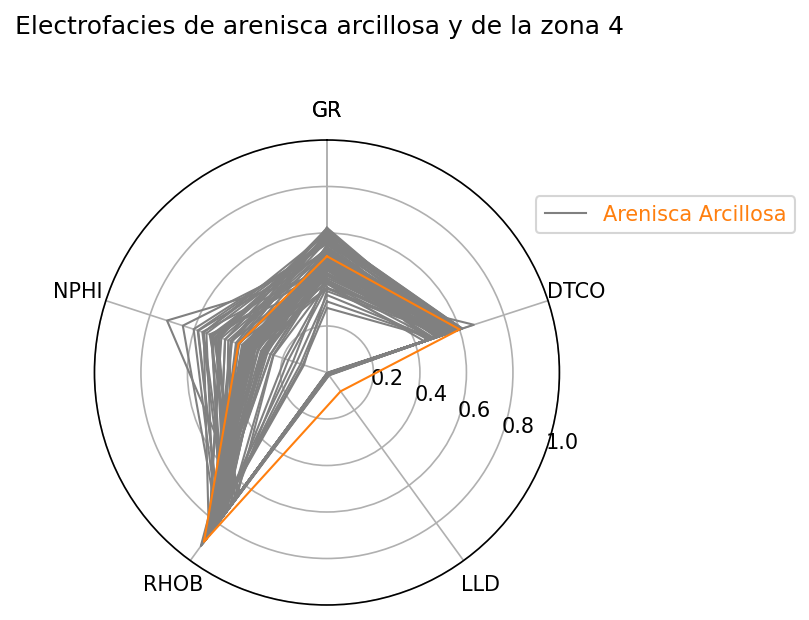

In [37]:
are_arc=np.array([0.5, 0.6, 0.1, 0.9, 0.4, 0.5])
etiquetas=['GR','DTCO','LLD','RHOB','NPHI','GR'] # se generan las labels para la grafica
angulos = np.linspace(0, 2*np.pi,len(rocas_norm[0])) # como es un circulo, se generan 5 angulos equidistantes de 0 a 2pi
angulos += angulos[:1] #se agrega el primero al final para cerrar la grafica

fig, ax = plt.subplots(figsize=(4, 5), subplot_kw=dict(polar=True))

for a in range(len(zcopy)):
    ax.plot(angulos, zcopy[a,:], color='gray', linewidth=1) #se grafica la linea

ax.plot(angulos, are_arc, color='C1', linewidth=1) #se grafica la arenisca
    
#Se acomodan las etiquetas
ax.set_theta_offset(np.pi/2) # para que inicien en las 12 en punto
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angulos),etiquetas) #se dibujan las etiquetas
ax.set_rticks((0.2, 0.4, 0.6, 0.8, 1.0))
ax.set_rlabel_position(110)

fig.set_dpi(150)

plt.legend(labelcolor=['C1'],labels=['Arenisca Arcillosa'],loc=(0.95, 0.8))

plt.suptitle('Electrofacies de arenisca arcillosa y de la zona 4', fontsize=12)
plt.show()

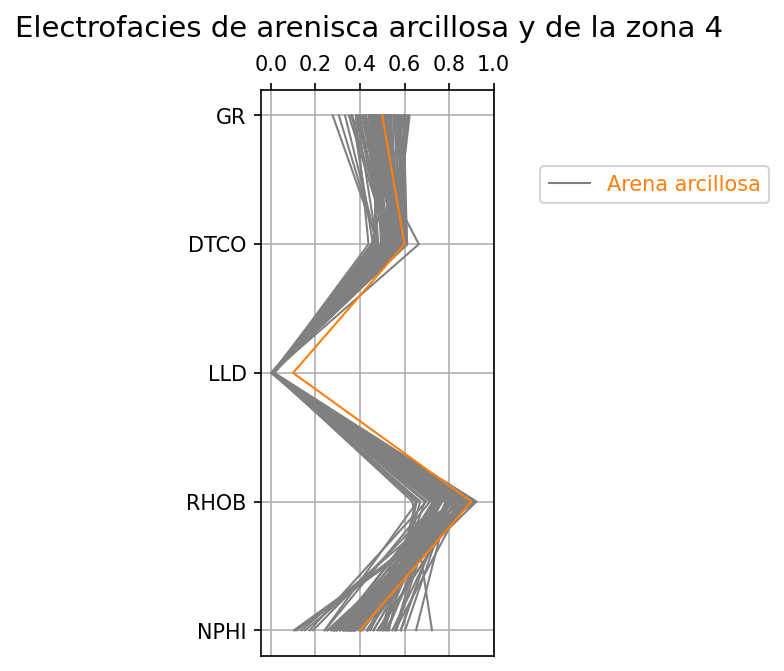

In [38]:
are_arc=np.array([0.5, 0.6, 0.1, 0.9, 0.4])
etiquetas=['GR','DTCO','LLD','RHOB','NPHI'] # se generan las labels para la grafica

fig, ax = plt.subplots(figsize=(2, 5))

for a in range(len(zcopy)):
    ax.plot(zcopy[a,0:5], etiquetas, color='gray', linewidth=1) #se grafica los datos

ax.plot(are_arc, etiquetas, color='C1', linewidth=1) #se grafica la arenisca

plt.grid(True)
ax.set_xticks((0.0, 0.2, 0.4, 0.6, 0.8, 1.0))
ax.invert_yaxis()
ax.xaxis.tick_top()
    
fig.set_dpi(150)

plt.legend(labelcolor=['C1'], labels=['Arena arcillosa'],loc=(1.2, 0.8))

plt.suptitle('Electrofacies de arenisca arcillosa y de la zona 4 ', fontsize=14)
plt.show()